In [1]:
import pandas as pd

naver_data = pd.read_excel("./data/naver_trend.xlsx", skiprows=6)
naver_data.head()

c:\potenup3\pj01-data-analysis\.venv\Lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,날짜,운세,날짜.1,사주,날짜.2,타로,날짜.3,취업운
0,2023-01-01,88.12084,2023-01-01,7.96156,2023-01-01,3.05103,2023-01-01,0.06726
1,2023-02-01,75.58285,2023-02-01,6.15384,2023-02-01,2.54938,2023-02-01,0.06092
2,2023-03-01,81.72417,2023-03-01,5.18040,2023-03-01,2.59205,2023-03-01,0.07887
3,2023-04-01,86.98193,2023-04-01,8.25359,2023-04-01,2.47783,2023-04-01,0.06553
4,2023-05-01,85.40962,2023-05-01,6.10812,2023-05-01,2.73300,2023-05-01,0.06619


In [2]:
naver_data = naver_data[["날짜", "운세", "사주", "타로", "취업운"]]
naver_data.columns = ["Time", "운세", "사주", "타로", "취업운"]
naver_data.head()

,Time,운세,사주,타로,취업운
0,2023-01-01,88.12084,7.96156,3.05103,0.06726
1,2023-02-01,75.58285,6.15384,2.54938,0.06092
2,2023-03-01,81.72417,5.18040,2.59205,0.07887
3,2023-04-01,86.98193,8.25359,2.47783,0.06553
4,2023-05-01,85.40962,6.10812,2.73300,0.06619


In [3]:
new_naver_data = naver_data.set_index("Time")
new_naver_data.head()

,운세,사주,타로,취업운
Time,,,,
2023-01-01,88.12084,7.96156,3.05103,0.06726
2023-02-01,75.58285,6.15384,2.54938,0.06092
2023-03-01,81.72417,5.18040,2.59205,0.07887
2023-04-01,86.98193,8.25359,2.47783,0.06553
2023-05-01,85.40962,6.10812,2.73300,0.06619


In [5]:
import pandas as pd

google_data = pd.read_csv("./data/google_trend.csv")
google_data.head()

,Time,운세,사주,타로,취업운
0,2022-12-01,64,51,22,0
1,2023-01-01,72,60,23,0
2,2023-02-01,60,51,20,0
3,2023-03-01,54,44,19,0
4,2023-04-01,52,57,21,0


In [6]:
naver_data.info()

<class 'pandas.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    36 non-null     str    
 1   운세      36 non-null     float64
 2   사주      36 non-null     float64
 3   타로      36 non-null     float64
 4   취업운     36 non-null     float64
dtypes: float64(4), str(1)
memory usage: 1.5 KB


In [7]:
new_google_data = google_data.set_index("Time")
new_google_data.head()

,운세,사주,타로,취업운
Time,,,,
2022-12-01,64,51,22,0
2023-01-01,72,60,23,0
2023-02-01,60,51,20,0
2023-03-01,54,44,19,0
2023-04-01,52,57,21,0


In [8]:
google_data.info()

<class 'pandas.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Time    37 non-null     str  
 1   운세      37 non-null     int64
 2   사주      37 non-null     int64
 3   타로      37 non-null     int64
 4   취업운     37 non-null     int64
dtypes: int64(4), str(1)
memory usage: 1.6 KB


In [9]:
total_data = new_naver_data + new_google_data
total_data.head()

,운세,사주,타로,취업운
Time,,,,
2022-12-01,NaN,NaN,NaN,NaN
2023-01-01,160.12084,67.96156,26.05103,0.06726
2023-02-01,135.58285,57.15384,22.54938,0.06092
2023-03-01,135.72417,49.18040,21.59205,0.07887
2023-04-01,138.98193,65.25359,23.47783,0.06553


In [10]:
total_data = total_data.dropna()
total_data.head()

,운세,사주,타로,취업운
Time,,,,
2023-01-01,160.12084,67.96156,26.05103,0.06726
2023-02-01,135.58285,57.15384,22.54938,0.06092
2023-03-01,135.72417,49.18040,21.59205,0.07887
2023-04-01,138.98193,65.25359,23.47783,0.06553
2023-05-01,131.40962,50.10812,20.73300,0.06619


In [11]:
total_data["합계"] = (
    total_data["운세"] + total_data["사주"] + total_data["타로"] + total_data["취업운"]
)

In [14]:
total_data.to_csv("data/sha_total_trend.csv", index=True)

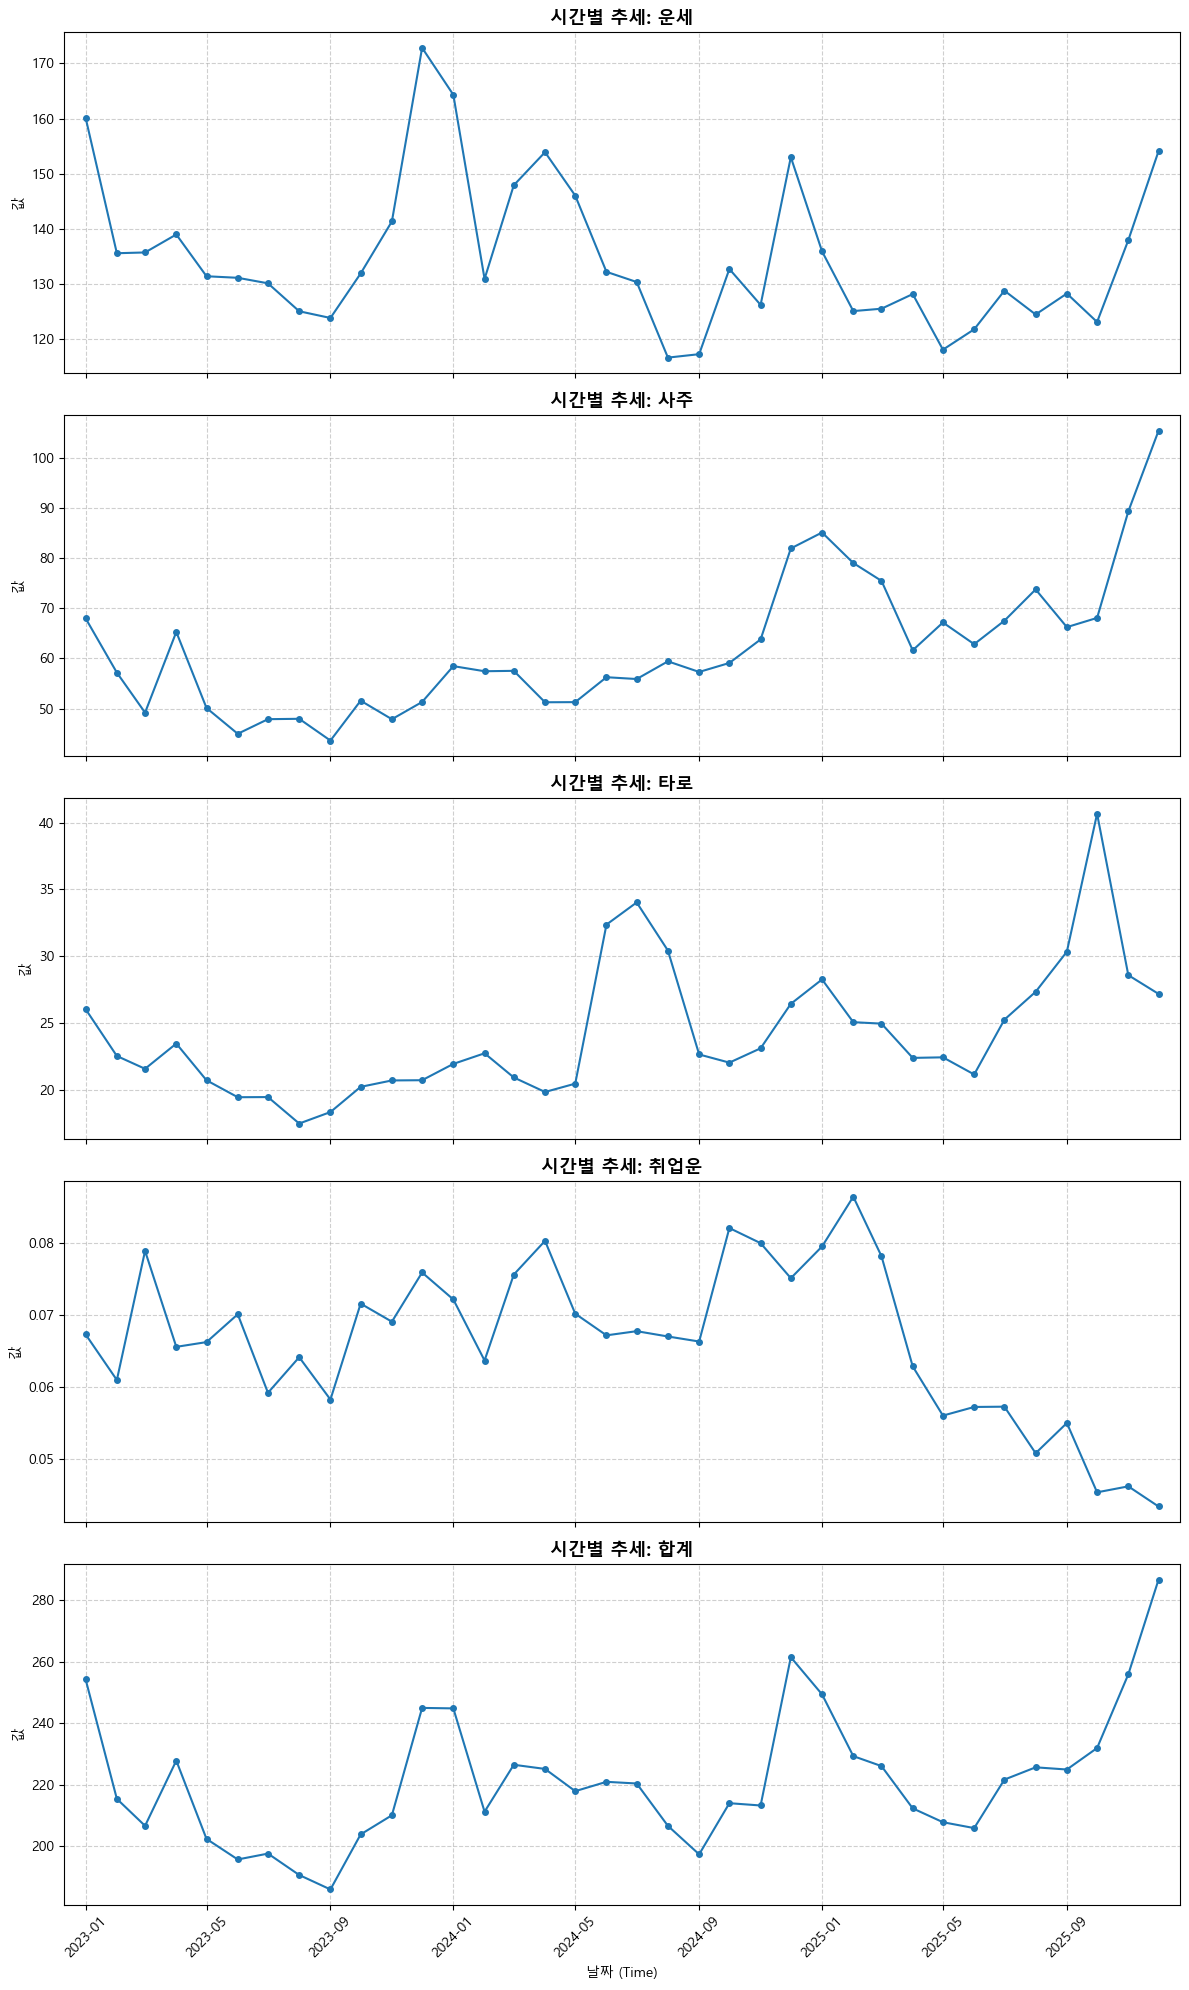

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. 데이터 불러오기
df = pd.read_csv("sha_total_trend.csv")

# 2. 'Time' 컬럼을 datetime 자료형으로 변환 (object -> datetime)
df["Time"] = pd.to_datetime(df["Time"])

# 3. 그래프 설정 (한글 폰트 및 마이너스 기호 깨짐 방지)
plt.rcParams["font.family"] = (
    "Malgun Gothic"  # 사용자 환경에 맞춰 'Malgun Gothic' 등으로 변경 가능
)
plt.rcParams["axes.unicode_minus"] = False

# 대상 컬럼 리스트 (Time 제외)
cols = [col for col in df.columns if col != "Time"]

# 4. Matplotlib 서브플롯 생성
fig, axes = plt.subplots(
    nrows=len(cols), ncols=1, figsize=(12, 4 * len(cols)), sharex=True
)

for i, col in enumerate(cols):
    axes[i].plot(
        df["Time"], df[col], marker="o", markersize=4, linestyle="-", linewidth=1.5
    )
    axes[i].set_title(f"시간별 추세: {col}", fontsize=13, fontweight="bold")
    axes[i].set_ylabel("값")
    axes[i].grid(True, linestyle="--", alpha=0.6)

    # y축 범위 자동 조절 (여백 최적화)
    axes[i].margins(x=0.02)

# x축 설정 (날짜 포맷 등)
axes[-1].set_xlabel("날짜 (Time)")
plt.xticks(rotation=45)  # 날짜가 겹칠 경우 회전

# 레이아웃 조정 및 출력
plt.tight_layout()
plt.show()